<a href="https://colab.research.google.com/github/nirjalalala/learn_ml/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading dataset

In [ ]:
# First and fore most dataset zip download garney then extract then upload in drive then
#navigate to drive/MyDrive/NetflixOriginal.csv   then copy path

#import section
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

#paste the copied path here yeta we used encoding='latin1' to avoid UnicodeDecodeError
df = pd.read_csv("/content/drive/MyDrive/NetflixOriginals.csv", encoding='latin1')

#aba check if the dataset is loaded sucessfully by printing the first 5 rows
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


##Data Exploration

In [3]:
#Data Profiling
# data kasto xa ani columns haru ko data-type bujhne
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None


In [4]:
#hamro sabai numeric columns ko statistical measures haru
#find out garne (descriptive statistics)

print(df.describe())

          Runtime  IMDB Score
count  584.000000  584.000000
mean    93.577055    6.271747
std     27.761683    0.979256
min      4.000000    2.500000
25%     86.000000    5.700000
50%     97.000000    6.350000
75%    108.000000    7.000000
max    209.000000    9.000000


In [5]:
print(df.value_counts())

Title                              Genre          Premiere            Runtime  IMDB Score  Language
#REALITYHIGH                       Comedy         September 8, 2017   99       5.2         English     1
Sol Levante                        Anime / Short  April 2, 2020       4        4.7         English     1
Seeing Allred                      Documentary    February 9, 2018    95       6.9         English     1
Sentinelle                         Action         March 5, 2021       80       4.7         French      1
Sergio                             Biopic         April 17, 2020      118      6.1         English     1
                                                                                                      ..
Hello Privilege. It's Me, Chelsea  Documentary    September 13, 2019  64       4.4         English     1
Heroin(e)                          Documentary    September 12, 2017  39       6.8         English     1
High Flying Bird                   Sports-drama   February 8

In [6]:
# Check total missing values per column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64


In [7]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


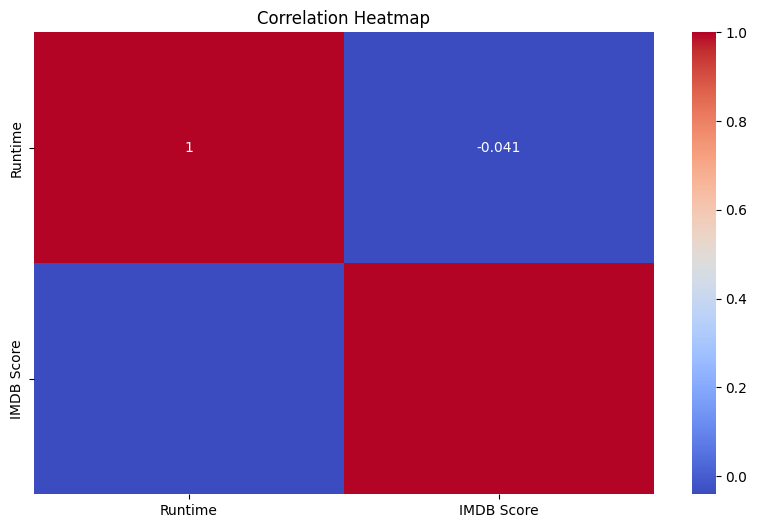

In [8]:
# Correlation matrix before any changes
# to show the difference between before and after EDA
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##Data Cleaning

In [9]:
# In DSA we do not change the main dsa but make a copy of the main dataset then edit the copy
df_copy = df.copy()

In [10]:
# Check data types of each column
print(df.dtypes)


Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object


In [11]:
# Since most object ma xan so lets catogorize them

#Converting string columns with repeated values to category
# by doing this it Saves memory and speeds up processing,
# especially during groupby or filtering.

df_copy['Genre'] = df_copy['Genre'].astype('category')
df_copy['Language'] = df_copy['Language'].astype('category')

# Converting Premiere to datetime since This is currently object, but it's a date
# Enables us to use .dt accessor for operations
# like extracting year, month, filtering by date, etc.
df_copy['Premiere'] = pd.to_datetime(df_copy['Premiere'], errors='coerce')

# Numerical columns lai xoddinxam since they are already correct
#now lets recheck our datatypes
print(df_copy.dtypes)


Title                 object
Genre               category
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language            category
dtype: object


In [28]:
df_copy['Premiere'].isnull().sum()

3

3 cells couldn't be converted into datetime. We can drop them.

In [39]:
df_copy = df_copy[  df_copy['Premiere'].notnull()]

In [41]:
df_copy['Premiere'].isnull().sum()

0

Now, there are no missing cells in our entire dataset.

In [12]:
df_copy['Title'].nunique(), df_copy.shape[0]
#here since every title is unique with no repetition we should keep title as objects

(584, 584)

##Data Visualization

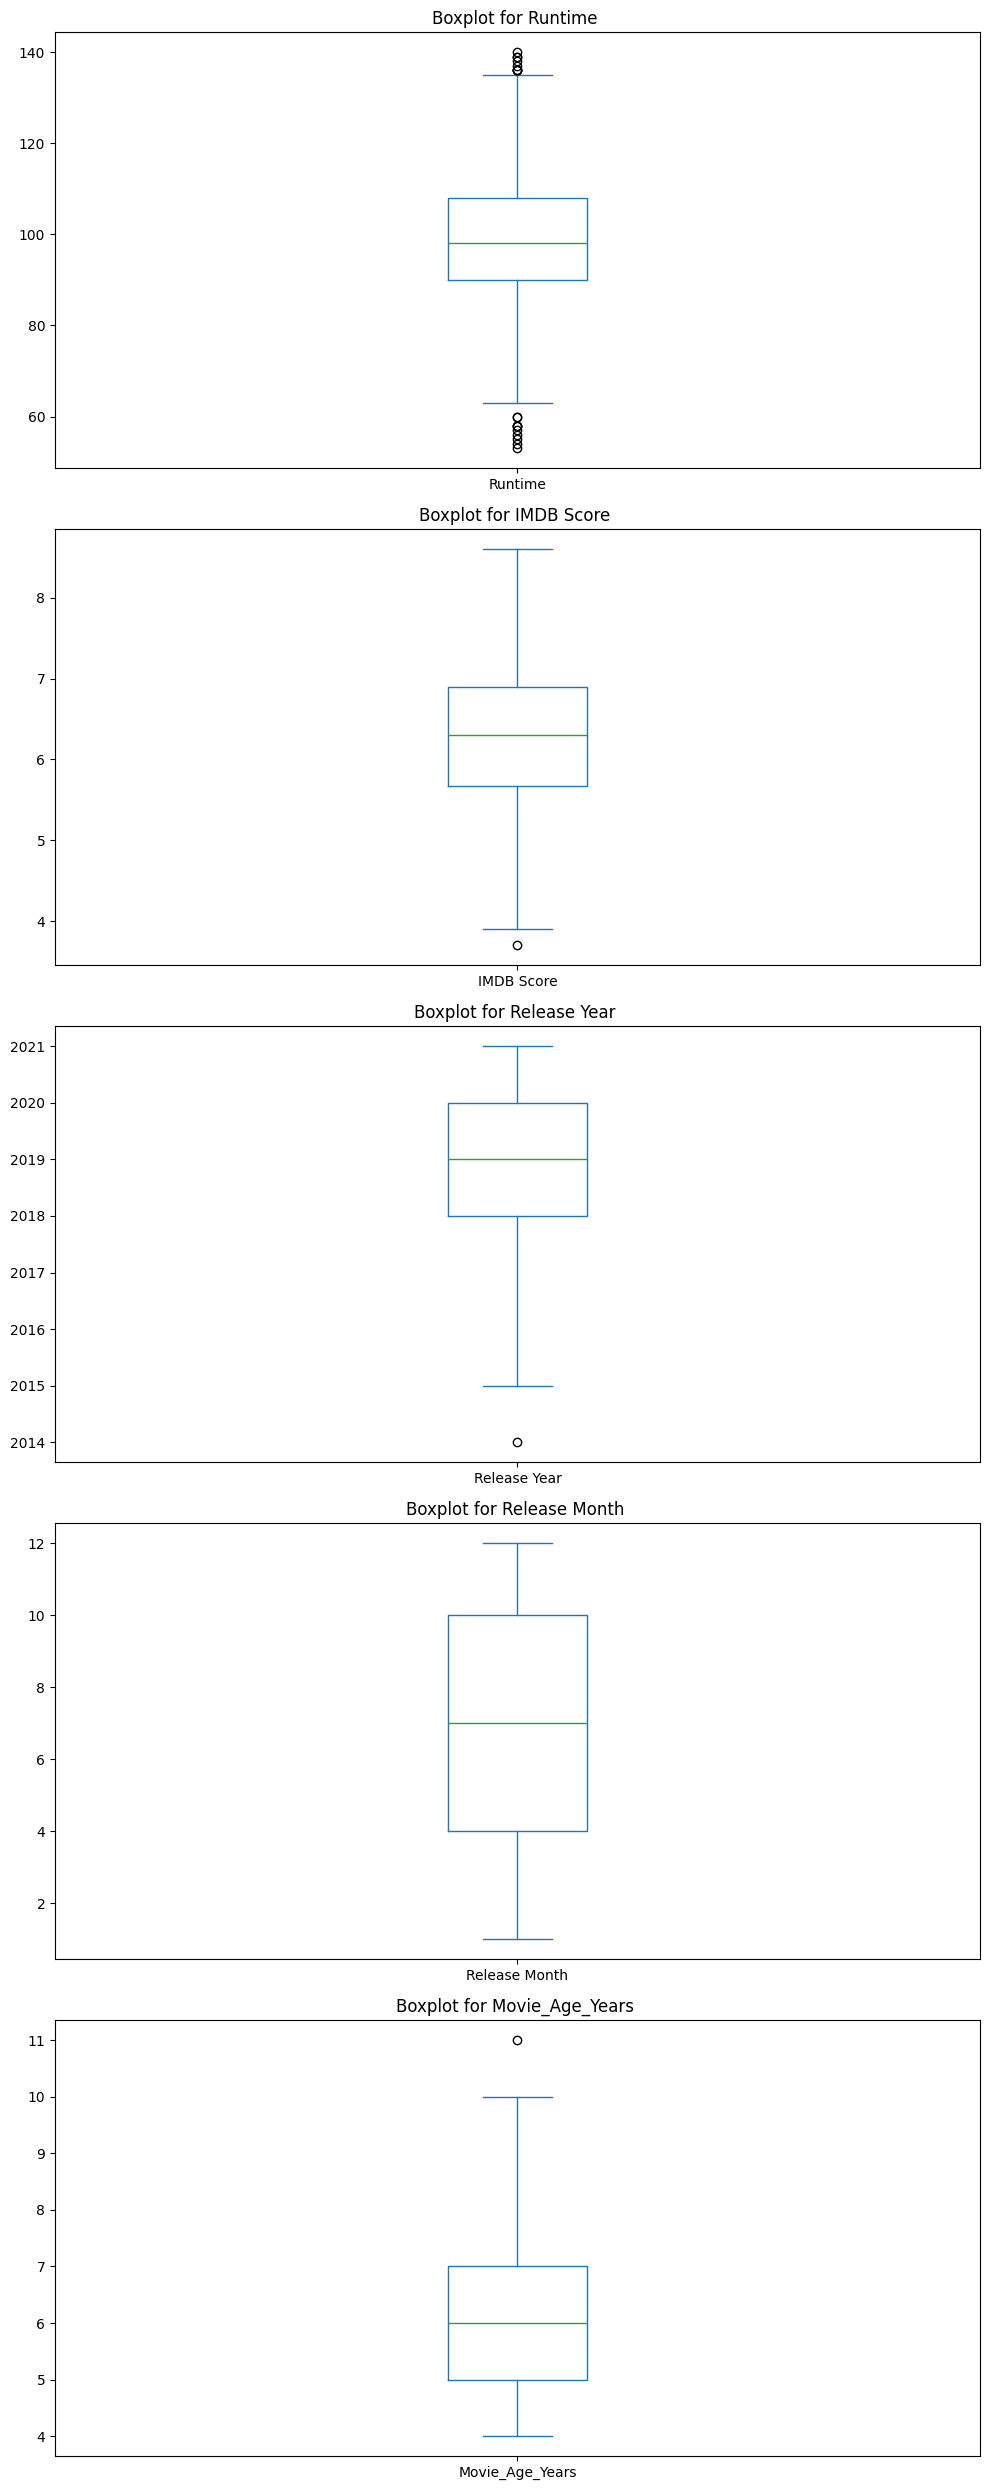

In [71]:
# selects all columns in df_copy that are numeric, and stores them in a new DataFrame called numeric_cols.
numeric_cols = df_copy.select_dtypes(include='number')

# This line creates separate boxplots for each numeric column (e.g., Runtime, IMDB Score)
# sabai numeric columns ko lagi individual boxplots banaucha — eauta eauta plot eauta column ko lagi
# 'subplots=True' le garda each plot afnai subplot ma aaucha
# 'layout=(len(numeric_cols.columns), 1)' le vertical layout banaune (one plot per row)
# 'figsize=(10, 5 * len(numeric_cols.columns))' le graph size set garcha depending on number of columns
# 'sharex=False' le x-axis haru lai independent banaune (not shared)
# 'color=blue' le boxplot ko line color blue banaune
# 'patch_artist=True' le fill color allow garcha box ma
# 'title=[...]' le har eauta subplot ko title set garcha (e.g., "Boxplot for Runtime")

numeric_cols.plot(kind='box', subplots=True, layout=(len(numeric_cols.columns), 1),
                  figsize=(10, 5 * len(numeric_cols.columns)), sharex=False,
                   title=[f'Boxplot for {col} ' for col in numeric_cols.columns])

plt.tight_layout()
plt.show()

In [14]:
# Calculate IQR for a specific column (e.g., 'Runtime')
Q1 = df_copy['Runtime'].quantile(0.25)
Q3 = df_copy['Runtime'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# aba bound vitra value xaina vane tyo row nai drop hunxa
df_copy = df_copy[(df_copy["Runtime"]<=upper_bound) & (df_copy["Runtime"]>=lower_bound) ]

In [15]:
# Calculate IQR for a specific column (e.g., 'IMDB Score')
Q1 = df_copy['IMDB Score'].quantile(0.25)
Q3 = df_copy['IMDB Score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#similar as above
df_copy = df_copy[(df_copy["IMDB Score"]<=upper_bound) & (df_copy["IMDB Score"]>=lower_bound) ]

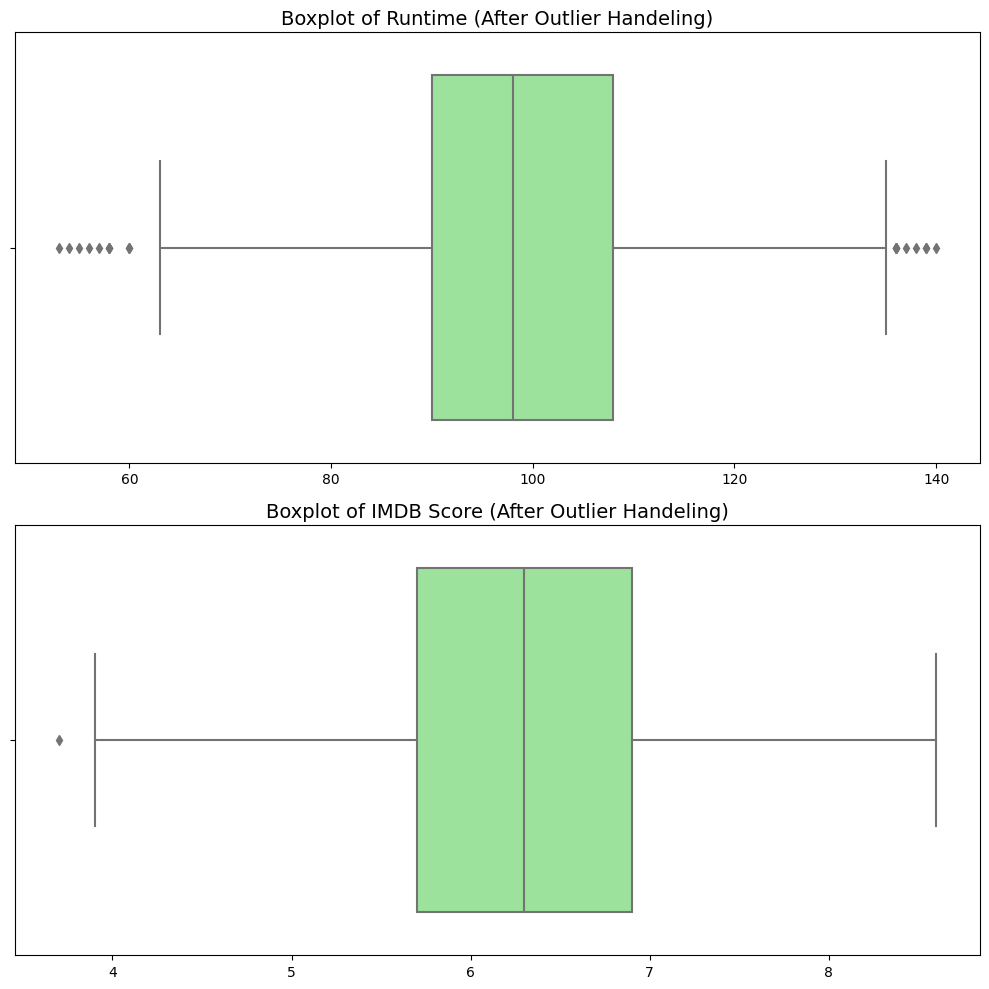

In [16]:
# yo code ma Outlier hataisakepachi data ko range ani distribution clearly dekhna sajilo huncha

# Select numeric columns only
numeric_cols = df_copy.select_dtypes(include='number')

# Set figure size based on number of numeric columns
plt.figure(figsize=(10, 5 * len(numeric_cols.columns)))

# Plot boxplot for each numeric column
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(len(numeric_cols.columns), 1, i)  # One plot per row
    sns.boxplot(data=df_copy, x=col, color='lightgreen')  # Boxplot with light green color
    plt.title(f'Boxplot of {col} (After Outlier Handeling)', fontsize=14)
    plt.xlabel("")  # Remove x-axis label for clean look

plt.tight_layout()
plt.show()

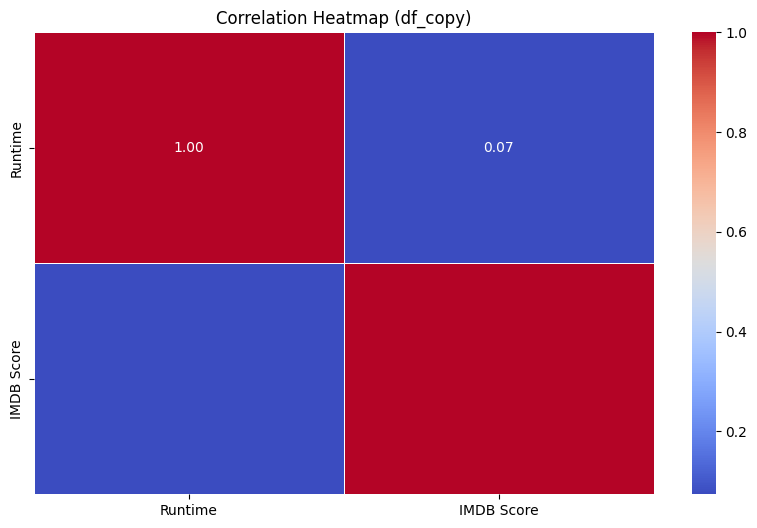


From the heatmap image, we can understand the following:

- Runtime and IMDB Score have a very weak positive correlation.

- This means that as Runtime increases, IMDB Score does not significantly increase or decrease
  there's almost no linear relationship between them.

- Each variable has a perfect correlation with itself (1.00), which is normal.



In [17]:
# This section helps understand relationships between numeric features like Runtime and IMDB Score
# Heatmap dekhaune correlation (kati related chan features)
# Regression plot and scatterplot le visually dekhaucha kasto sambandha cha between 2 variables

# Correlation Matrix for numeric columns
correlation_matrix_copy = df_copy.corr(numeric_only=True)

# Heatmap to visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_copy, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (df_copy)')
plt.show()

print("""
From the heatmap image, we can understand the following:

- Runtime and IMDB Score have a very weak positive correlation.

- This means that as Runtime increases, IMDB Score does not significantly increase or decrease
  there's almost no linear relationship between them.

- Each variable has a perfect correlation with itself (1.00), which is normal.
""")


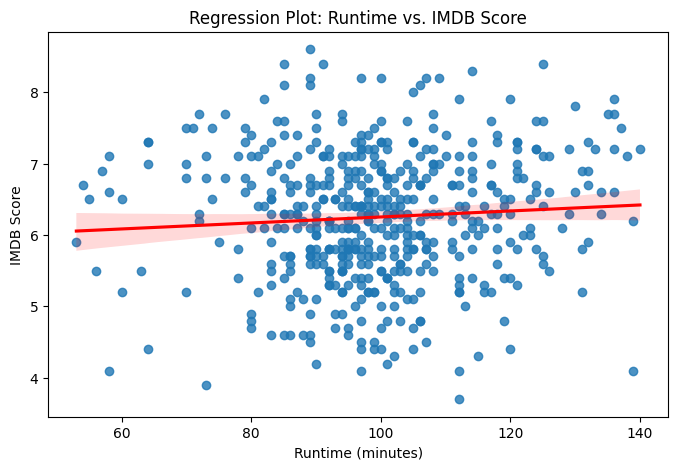

In [72]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Runtime', y='IMDB Score', data=df_copy, line_kws={"color": "red"})
plt.title('Regression Plot: Runtime vs. IMDB Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Score')
plt.show()



From the regression plot (Runtime vs. IMDB Score), we can understand the following:

- The red line represents the best-fit line showing the trend between Runtime and IMDB Score.

- The line is slightly sloped upwards, indicating a very weak positive relationship
   as Runtime increases, IMDB Score may slightly increase, but not in a strong or clear way.

- The scatter of points is widely spread, showing high variability and no strong pattern,
   which matches the weak correlation (0.07) seen in the heatmap.


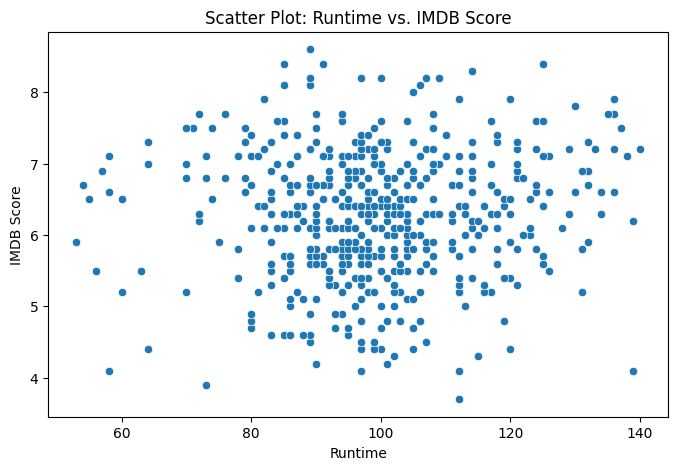

In [73]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Runtime', y='IMDB Score', data=df_copy)
plt.title('Scatter Plot: Runtime vs. IMDB Score')
plt.xlabel('Runtime')
plt.ylabel('IMDB Score')
plt.show()



From the scatter plot (Runtime vs. IMDB Score), we can understand the following:

- The data points are widely scattered with no clear upward or downward trend.

- This indicates a "very weak or no linear relationship" between Runtime and IMDB Score.

- There’s a concentration of points around 100 minutes Runtime and IMDB Score of around 6,
   but overall the spread is quite random.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


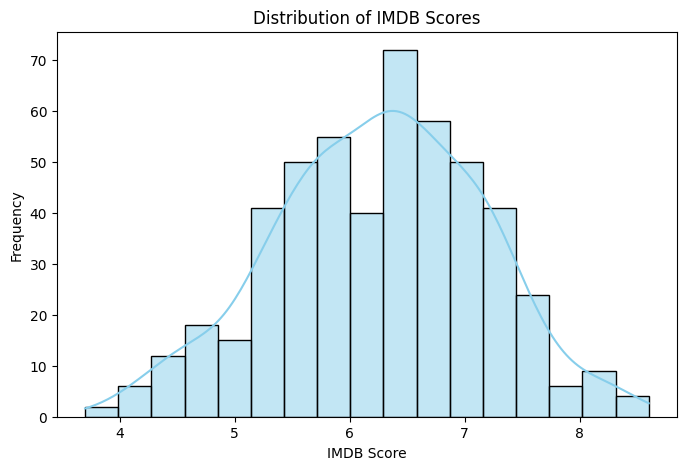

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df_copy['IMDB Score'], kde=True, color='skyblue')
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.show()

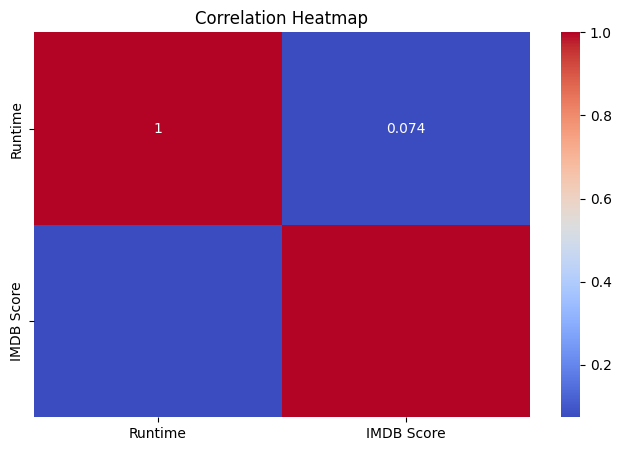

In [21]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-22-3ea91dcc2f8d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_copy['Runtime'], shade=True, color='orange')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


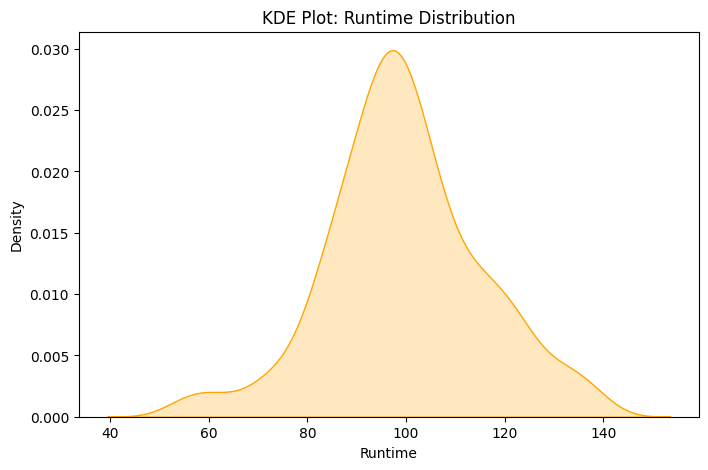

In [22]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_copy['Runtime'], shade=True, color='orange')
plt.title('KDE Plot: Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Density')
plt.show()


##Feature Engineering

In [23]:
# Create a new feature 'Runtime_Category' based on runtime duration
def categorize_runtime(runtime):
    if runtime < 90:
        return 'Short'
    elif runtime <= 120:
        return 'Medium'
    else:
        return 'Long'

df_copy['Runtime_Category'] = df_copy['Runtime'].apply(categorize_runtime)

# Display the updated DataFrame
print(df_copy.head())

explanation = """
1. It Makes a Continuous Feature More Interpretable
Runtime is a continuous numeric feature, which can be hard to interpret directly.

By categorizing it into groups like Short, Medium, and Long, we can better understand patterns and differences in how runtime relates to other variables (like IMDB Score).

Humans are naturally better at reasoning about groups/categories than raw numbers.

2. It Helps Identify Trends or Biases
We can now check if longer movies tend to have better or worse IMDB scores compared to short or medium ones.

This insight is valuable for producers or analysts who want to know:
"Does movie length impact audience ratings?"

3. Useful for Visualizations & Modeling
Categorical features are easier to compare visually using:

• Count plots (for distribution)
• Box plots (for comparisons of distributions across categories)

Also, if used in modeling later, categorical features can be encoded and often improve model interpretability.

 4. More Meaningful than Arbitrary Binning
We chose Runtime_Category over something like binning IMDB scores or release year because:

• Runtime is directly measurable and likely to influence viewer perception.
• Grouping IMDB scores or Premiere years might not have a clear, interpretable logic
  (e.g., what's the difference between a 6.3 and 6.5 movie in categories?).
"""

print(explanation)

                   Title                    Genre   Premiere  Runtime  \
6      Leyla Everlasting                   Comedy 2020-12-04      112   
8                Paradox  Musical/Western/Fantasy 2018-03-23       73   
9     Sardar Ka Grandson                   Comedy 2021-05-18      139   
10  Searching for Sheela              Documentary 2021-04-22       58   
11              The Call                    Drama 2020-11-27      112   

    IMDB Score Language Runtime_Category  
6          3.7  Turkish           Medium  
8          3.9  English            Short  
9          4.1    Hindi             Long  
10         4.1  English            Short  
11         4.1   Korean           Medium  

1. It Makes a Continuous Feature More Interpretable
Runtime is a continuous numeric feature, which can be hard to interpret directly.

By categorizing it into groups like Short, Medium, and Long, we can better understand patterns and differences in how runtime relates to other variables (like IMDB Sco

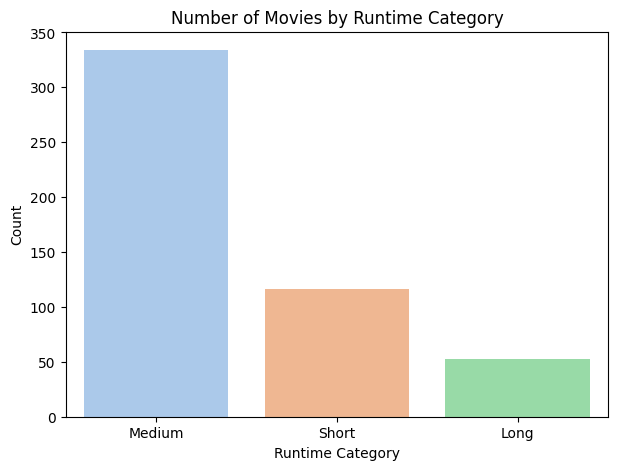

In [24]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Runtime_Category', data=df_copy, palette='pastel')
plt.title('Number of Movies by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Count')
plt.show()


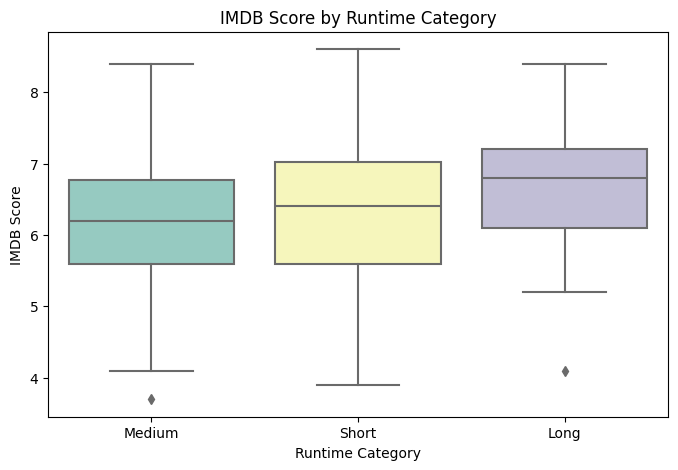

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Runtime_Category', y='IMDB Score', data=df_copy, palette='Set3')
plt.title('IMDB Score by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('IMDB Score')
plt.show()


In [43]:
# Extract the year from the 'Premiere' column and create a new column 'Release Year'
df_copy['Release Year'] = df_copy['Premiere'].dt.year

# Extract the month from the 'Premiere' column and create a new column 'Release Month'
df_copy['Release Month'] = df_copy['Premiere'].dt.month

# Extract the day of the week (e.g., Monday, Tuesday)
df_copy['Release DayofWeek'] = df_copy['Premiere'].dt.day_name()

# Display the DataFrame with the new datetime features
print(df_copy[['Premiere', 'Release Year', 'Release Month', 'Release DayofWeek']].head())



# You can now use these new 'Release Year', 'Release Month', 'Release DayofWeek' columns
# for further analysis and visualizations, like plotting average IMDB score by year or month.

     Premiere  Release Year  Release Month Release DayofWeek
6  2020-12-04          2020             12            Friday
8  2018-03-23          2018              3            Friday
9  2021-05-18          2021              5           Tuesday
10 2021-04-22          2021              4          Thursday
11 2020-11-27          2020             11            Friday


<ipython-input-43-9712b8d16823>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Release Year'] = df_copy['Premiere'].dt.year
<ipython-input-43-9712b8d16823>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Release Month'] = df_copy['Premiere'].dt.month
<ipython-input-43-9712b8d16823>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [44]:
# Filter movies released after a specific date (e.g., after Jan 1, 2020)
movies_after_2020 = df_copy[df_copy['Premiere'] > '2020-01-01']
print("\nMovies premiered after 2020-01-01:")
print(movies_after_2020[['Title', 'Premiere']].head())



Movies premiered after 2020-01-01:
                   Title   Premiere
6      Leyla Everlasting 2020-12-04
9     Sardar Ka Grandson 2021-05-18
10  Searching for Sheela 2021-04-22
11              The Call 2020-11-27
12               Whipped 2020-09-18


In [50]:

# Group by Release Year and count the number of movies released each year
movies_per_year = df_copy.groupby('Release Year').size().reset_index(name='Count')
print("\nNumber of movies released per year:")
print(movies_per_year)

# Group by Release month and count the number of movies released each month
movies_per_month = df_copy.groupby('Release Month').size().reset_index(name='Count')
print("\nNumber of movies released per month:")
print(movies_per_month)

# Group by Release Day and count the number of movies released each day
movies_per_day = df_copy.groupby('Release DayofWeek').size().reset_index(name='Count')
print("\nNumber of movies released per day:")
print(movies_per_day)



# You can now use these new 'Release Year', 'Release Month', 'Release DayofWeek' columns
# for further analysis and visualizations, like plotting average IMDB score by year or month.


Number of movies released per year:
   Release Year  Count
0          2014      1
1          2015      9
2          2016     27
3          2017     59
4          2018     86
5          2019     96
6          2020    156
7          2021     66

Number of movies released per month:
    Release Month  Count
0               1     32
1               2     37
2               3     46
3               4     56
4               5     47
5               6     30
6               7     29
7               8     31
8               9     42
9              10     63
10             11     46
11             12     41

Number of movies released per day:
  Release DayofWeek  Count
0            Friday    344
1            Monday     11
2          Saturday      4
3            Sunday      6
4          Thursday     48
5           Tuesday     19
6         Wednesday     68


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


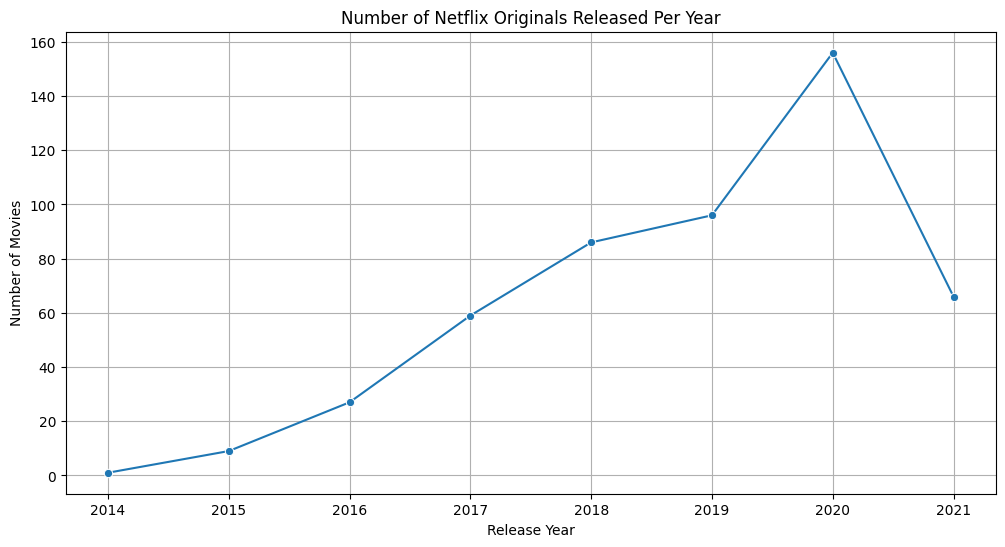

In [46]:
# Visualize the number of movies released per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Year', y='Count', data=movies_per_year, marker='o')
plt.title('Number of Netflix Originals Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

2020 samma movie haru release hune trend chai yearly increase vairathyo, but 2021 ma aayera sharp decline vayo.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


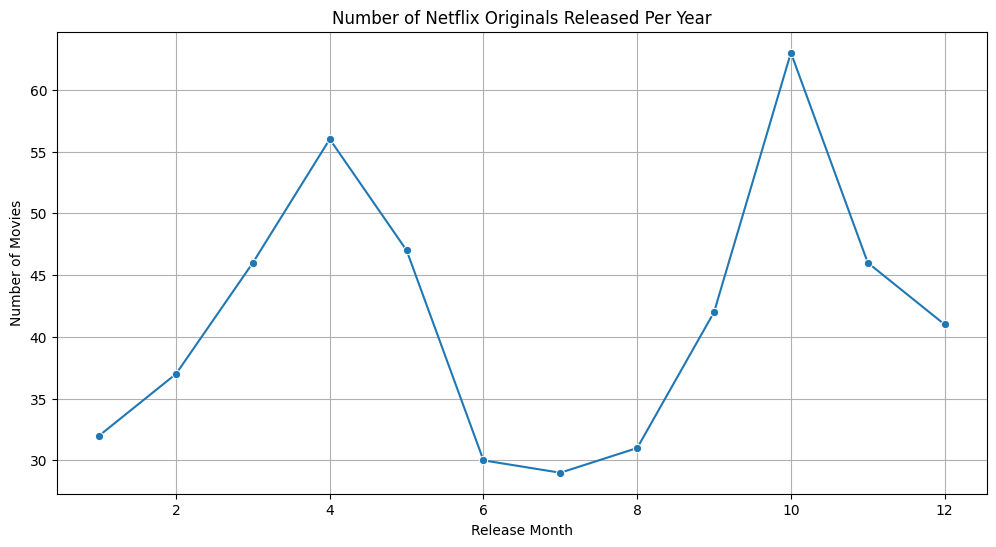

In [52]:
# Visualize the number of movies released per month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Month', y='Count', data=movies_per_month, marker='o')
plt.title('Number of Netflix Originals Released Per Year')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

jan, june, april, may ma thorai movies release vako xa.<br>
Sabai vanda dherai chai October ma ra April ma peak vako xa.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


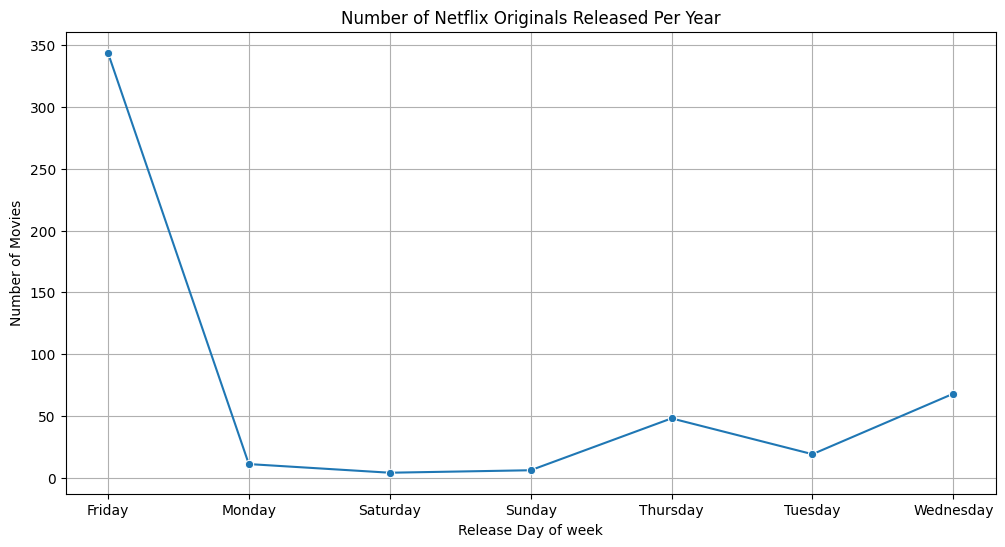

In [55]:
# Visualize the number of movies released per month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release DayofWeek', y='Count', data=movies_per_day, marker='o')
plt.title('Number of Netflix Originals Released Per Year')
plt.xlabel('Release Day of week')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Friday ma release vako raixa dherai jaso movie haru.

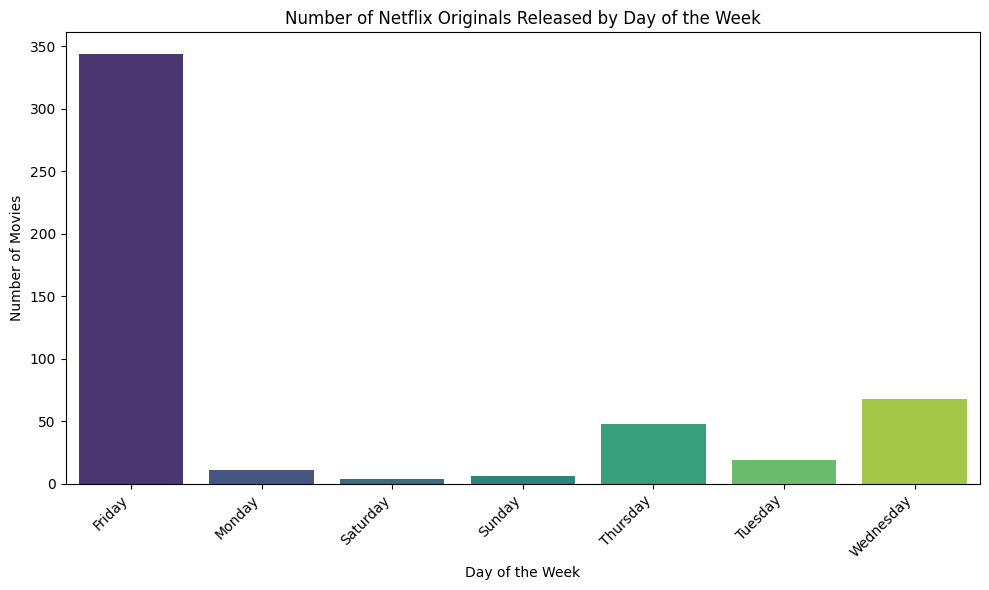

In [61]:
# Visualize the number of movies released per day of the week
plt.figure(figsize=(10, 6)) # Adjust figure size for readability
sns.barplot(x='Release DayofWeek', y='Count', data=movies_per_day, palette='viridis')
plt.title('Number of Netflix Originals Released by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [62]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Calculate the age of the movie in years
df_copy['Movie_Age_Years'] = current_year - df_copy['Release Year']

# Display the DataFrame with the new 'Movie_Age_Years' column
print(df_copy[['Title', 'Premiere', 'Release Year', 'Movie_Age_Years']].head())

                   Title   Premiere  Release Year  Movie_Age_Years
6      Leyla Everlasting 2020-12-04          2020                5
8                Paradox 2018-03-23          2018                7
9     Sardar Ka Grandson 2021-05-18          2021                4
10  Searching for Sheela 2021-04-22          2021                4
11              The Call 2020-11-27          2020                5


<ipython-input-62-0ccb1f50816f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Movie_Age_Years'] = current_year - df_copy['Release Year']


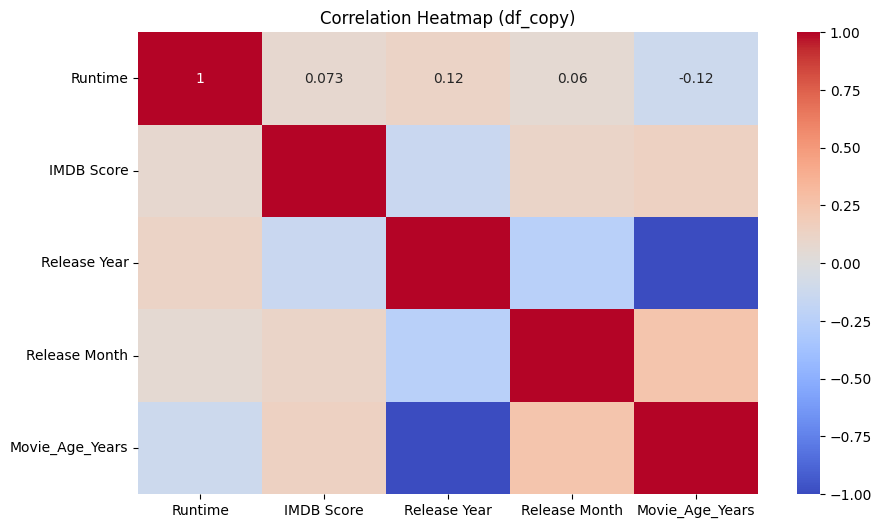


From the heatmap image, you can now observe the correlation between 'Movie_Age_Years'
and 'IMDB Score'. A number close to 1 indicates a strong positive correlation,
a number close to -1 indicates a strong negative correlation, and a number close to 0
indicates a weak or no linear correlation.



In [67]:
# Recalculate Correlation Matrix for numeric columns including the new 'Movie_Age_Years'
correlation_matrix_copy = df_copy.corr(numeric_only=True)

# Heatmap to visualize correlation with the new column
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_copy, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (df_copy)')
plt.show()

print("""
From the heatmap image, you can now observe the correlation between 'Movie_Age_Years'
and 'IMDB Score'. A number close to 1 indicates a strong positive correlation,
a number close to -1 indicates a strong negative correlation, and a number close to 0
indicates a weak or no linear correlation.
""")

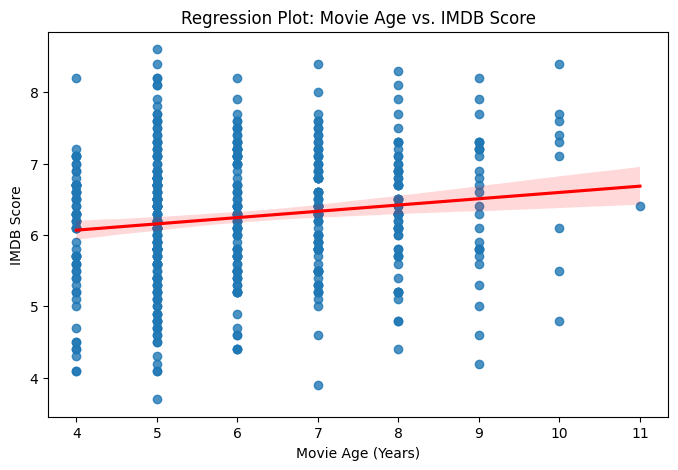


From the regression plot (Movie Age vs. IMDB Score), you can visually assess the relationship.
Look at the slope of the red line and the spread of the scatter points.
A downward slope suggests older movies tend to have lower scores, and an upward slope
suggests older movies tend to have higher scores. A relatively flat line and widely
scattered points indicate a weak or no linear relationship.



In [68]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Movie_Age_Years', y='IMDB Score', data=df_copy, line_kws={"color": "red"})
plt.title('Regression Plot: Movie Age vs. IMDB Score')
plt.xlabel('Movie Age (Years)')
plt.ylabel('IMDB Score')
plt.show()

print("""
From the regression plot (Movie Age vs. IMDB Score), you can visually assess the relationship.
Look at the slope of the red line and the spread of the scatter points.
A downward slope suggests older movies tend to have lower scores, and an upward slope
suggests older movies tend to have higher scores. A relatively flat line and widely
scattered points indicate a weak or no linear relationship.
""")

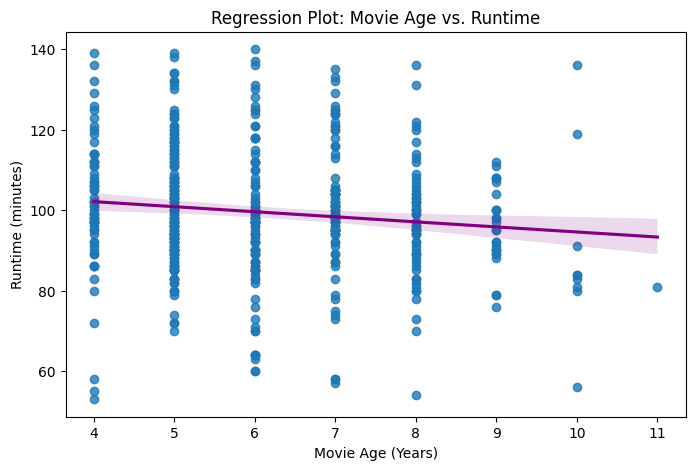


From the regression plot (Movie Age vs. Runtime), observe the following:

- The slope of the purple line: Is it upwards, downwards, or flat? This indicates whether
  older movies tend to be longer, shorter, or have no consistent change in runtime.

- The spread of the points: Are the points clustered tightly around the line or widely scattered?
  A tight cluster indicates a stronger relationship, while wide scattering indicates a weaker one.

Compare the visual trend and the correlation coefficient from the heatmap to understand
the relationship between how old a Netflix Original is and its runtime.



In [69]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Movie_Age_Years', y='Runtime', data=df_copy, line_kws={"color": "purple"}) # Using a different color
plt.title('Regression Plot: Movie Age vs. Runtime')
plt.xlabel('Movie Age (Years)')
plt.ylabel('Runtime (minutes)')
plt.show()

print("""
From the regression plot (Movie Age vs. Runtime), observe the following:

- The slope of the purple line: Is it upwards, downwards, or flat? This indicates whether
  older movies tend to be longer, shorter, or have no consistent change in runtime.

- The spread of the points: Are the points clustered tightly around the line or widely scattered?
  A tight cluster indicates a stronger relationship, while wide scattering indicates a weaker one.

Compare the visual trend and the correlation coefficient from the heatmap to understand
the relationship between how old a Netflix Original is and its runtime.
""")

In [26]:
summary = f"""
Summary of Insights from Netflix Originals Data Analysis

1. Medium-Length Movies Are the Norm
   Most Netflix Originals tend to be around 60-90 minutes long.
   This suggests that Netflix might be targeting viewer preferences for content that’s not too short or too long
   just the right length to keep audiences engaged.

2. IMDB Scores are Slightly Skewed Toward the Higher Side
   The average IMDB rating is approximately {df_copy['IMDB Score'].mean():.2f}.
   Most movies score between 6 and 7, but there are some outliers that scored much higher or lower.

3. Movie Length Doesn’t Strongly Impact Ratings
   We checked the correlation between Runtime and IMDB Score and found it to be very weak (around 0.07).
   In short, longer movies aren’t necessarily rated higher.

4. English Dominates as the Primary Language
   As expected, English is the most common language for Netflix Originals.
   While a few titles are in other languages, they’re relatively rare in comparison.

5. Some Notable Outliers in Runtime and Ratings
   Our boxplots showed that a few movies run over 150 minutes or have extreme ratings
   very high or very low. These are worth deeper exploration, as they might skew averages or highlight unique cases.

"""
print(summary)



Summary of Insights from Netflix Originals Data Analysis

1. Medium-Length Movies Are the Norm
   Most Netflix Originals tend to be around 60-90 minutes long.
   This suggests that Netflix might be targeting viewer preferences for content that’s not too short or too long
   just the right length to keep audiences engaged.

2. IMDB Scores are Slightly Skewed Toward the Higher Side
   The average IMDB rating is approximately 6.25.
   Most movies score between 6 and 7, but there are some outliers that scored much higher or lower.

3. Movie Length Doesn’t Strongly Impact Ratings
   We checked the correlation between Runtime and IMDB Score and found it to be very weak (around 0.07).
   In short, longer movies aren’t necessarily rated higher.

4. English Dominates as the Primary Language
   As expected, English is the most common language for Netflix Originals.
   While a few titles are in other languages, they’re relatively rare in comparison.

5. Some Notable Outliers in Runtime and Ratin

In [ ]:
!pip install ydata-profiling==4.6.4

from ydata_profiling import ProfileReport


In [ ]:

profile = ProfileReport(df_copy)

# To display the report in the output
profile.to_notebook_iframe()
